In [6]:
from skimage.io import imread
from skimage.segmentation import slic
from sklearn.cluster import KMeans
from skimage.transform import resize
from skimage.color import rgb2hsv
from skimage import exposure

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib.patches as mpatches
from copy import deepcopy
import numpy as np
%matplotlib inline

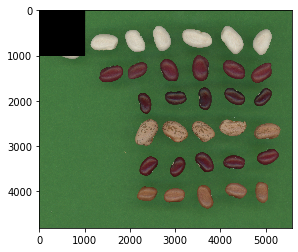

In [12]:
color = {
    'black':[0,0,0],
    'white':[255,255,255],
    'red':[255,0,0],
    'green':[0,255,0],
    'blue':[0,0,255],
    'magenta':[255,255,0]
}
image = imread("MADP_SB_8_003.tif")
box = np.full((1000,1000), 1)
fig, ax = plt.subplots()
ax.imshow(image)
coords = np.where(box)
patch = path.Path(list(zip(coords[0], coords[1])))
ax.add_patch(mpatches.PathPatch(patch, facecolor='r'))
plt.show()

In [ ]:
# shrink image for faster training
shrink_dims = (int(image.shape[0] / 4), int(image.shape[1] / 4), 3)
image_shrunk = resize(image, shrink_dims, preserve_range=True).astype(int)
features = image_shrunk.reshape((shrink_dims[0] * shrink_dims[1], shrink_dims[2]))

In [ ]:
K = 4
model = KMeans(n_clusters = K)
labels = model.fit(features)

In [ ]:
labels = model.predict(image.reshape(image.shape[0] * image.shape[1], 3))

In [ ]:
model.cluster_centers_

In [ ]:
image_flattened_dims = (image.shape[0] * image.shape[1], 3)
labels = model.predict(image.reshape(image_flattened_dims))

In [ ]:
model.cluster_centers_

In [ ]:
labels = labels.reshape(image.shape[:2])
image2 = image.copy()

for i, c in enumerate(list(color.values())[:K]):
    image2[labels == i] = c

plt.imshow(image2)
plt.show()

In [ ]:
model2 = KMeans(n_clusters = 4)
model2.cluster_centers_ = model.cluster_centers_

In [ ]:
labels2 = model2.predict(image.reshape(image.shape[0] * image.shape[1], 3)).reshape(image.shape[:2])

In [ ]:
image3 = image.copy()
for i, c in enumerate(list(color.values())[:K]):
    image3[labels2 == i] = c

plt.imshow(image3)
plt.show()

In [ ]:
import cv2

img = cv2.imread("MADP_SB_8_003.tif")
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
hsv_image = rgb2hsv(image)

In [ ]:
vals, counts = np.unique(hsv_image, return_counts=True)
print(np.max(counts))
print(vals[np.argsort(counts)[-10:]])

In [ ]:
image1 = image.copy()
image1[hsv_image[:,:,2] in vals[np.argsort(counts)[-10:]]] = [0,0,0]

In [ ]:
plt.imshow(image1)

In [ ]:
plt.hist(hsv_image[:,:,2].ravel(), bins=256)
plt.show()

In [ ]:
vals, counts = np.unique(hsv_img, return_counts=True)

In [ ]:
vals[np.argmax(counts)]

In [ ]:
plt.imshow(hsv_img, cmap=plt.hsv())
plt.show()

In [ ]:
hsv_img = [0,0,0]

In [ ]:
data = pd.read_csv('MADP_image_pheno.csv')

In [ ]:
data.head()

In [ ]:
data[(data['Image#'] == 1) & (data['Row#'] == 2)]['Genotype']


In [ ]:
data.columns

In [ ]:
row = dict(zip(data.columns, range(len(data.columns))))

In [ ]:
list(row.keys()) == list(data.columns)

In [ ]:
row.pop('Image#')
row.pop('Row#')
row.pop('Genotype')

In [ ]:
data[(data['Image#'] == 1) & (data['Row#'] == 2)]['Genotype']